In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import h5py

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Loading Data

In [3]:
def load_data(filename):
    data=pd.read_hdf(filename)
    return data

In [4]:
data = load_data("1.h5")
columns=data.columns

In [5]:
data.describe()

,speed_limit,speed,previous_speed,id,safe_net_front,key
count,1.000000e+05,100000.000000,100000.000000,100000.0,100000.000000,100000.000000
mean,3.333336e+01,20.869788,20.869788,530004.0,41.882330,49999.500000
std,3.912978e-11,5.411028,5.411028,0.0,10.330811,28867.657797
min,3.333336e+01,1.000000,1.000000,530004.0,4.000000,0.000000
25%,3.333336e+01,16.265542,16.265542,530004.0,33.000000,24999.750000
50%,3.333336e+01,19.150844,19.150844,530004.0,38.000000,49999.500000
75%,3.333336e+01,25.429488,25.429488,530004.0,50.000000,74999.250000
max,3.333336e+01,33.333366,33.333366,530004.0,66.000000,99999.000000


## Univariate 

In [6]:
def plot_counts_bar_chart(data,column_name):
    values,counts=np.unique(data,return_counts=True)
    if (len(values)==1):
        print ("only 1 unique value")
        print ("value={}".format(values[0]))
        print ("count={}".format(counts[0]))
        return
    plt.figure(figsize=(20,10))
    ax=sns.countplot(x=data)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=15)
    y=ax.get_yaxis()
    y.set_tick_params(labelsize=20)
    ax.set_xlabel(column_name,fontsize=30)
    ax.set_ylabel("count",fontsize=30)
    
    ax.set_title("Histogram for "+column_name,fontsize=50)
    plt.tight_layout()
    plt.show()

# Histogram of Previous Decision

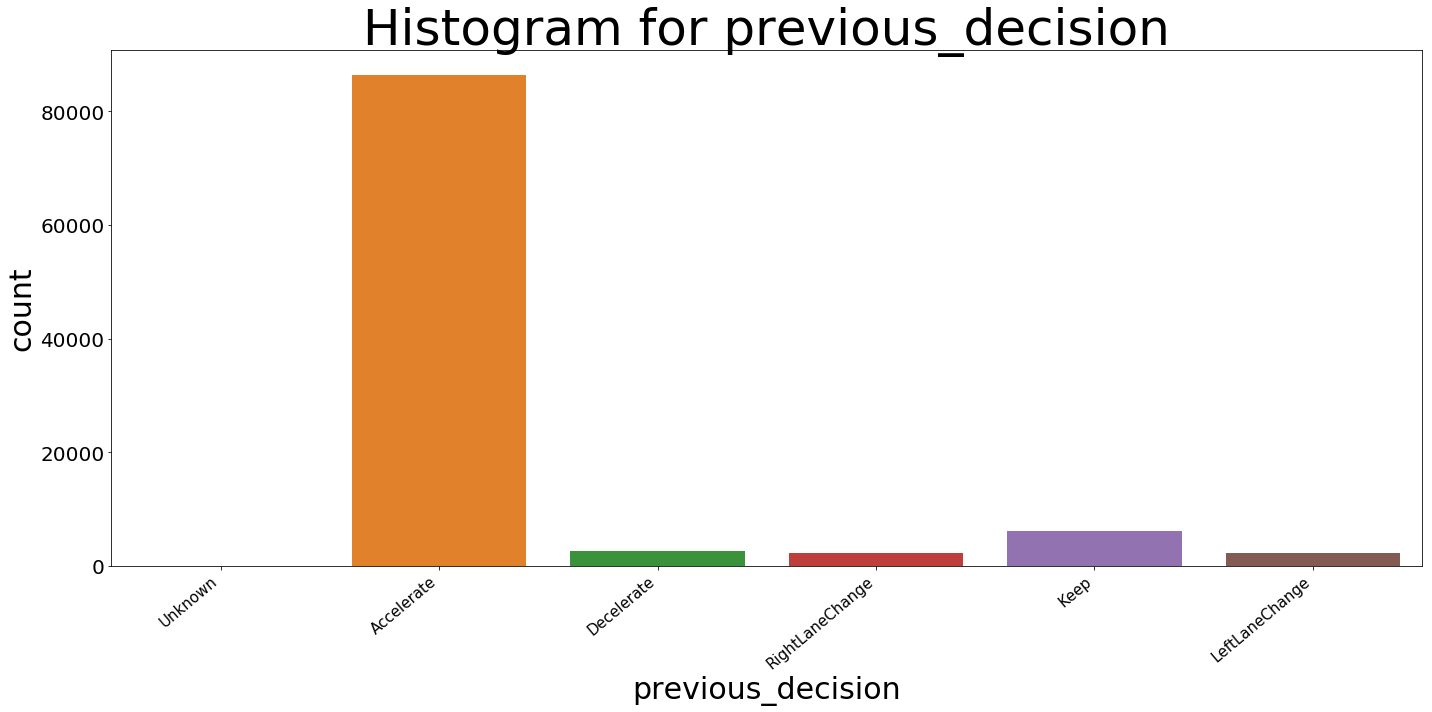

In [7]:
plot_counts_bar_chart(data['previous_decision'],"previous_decision")

# Histogram of Lance Change Mode

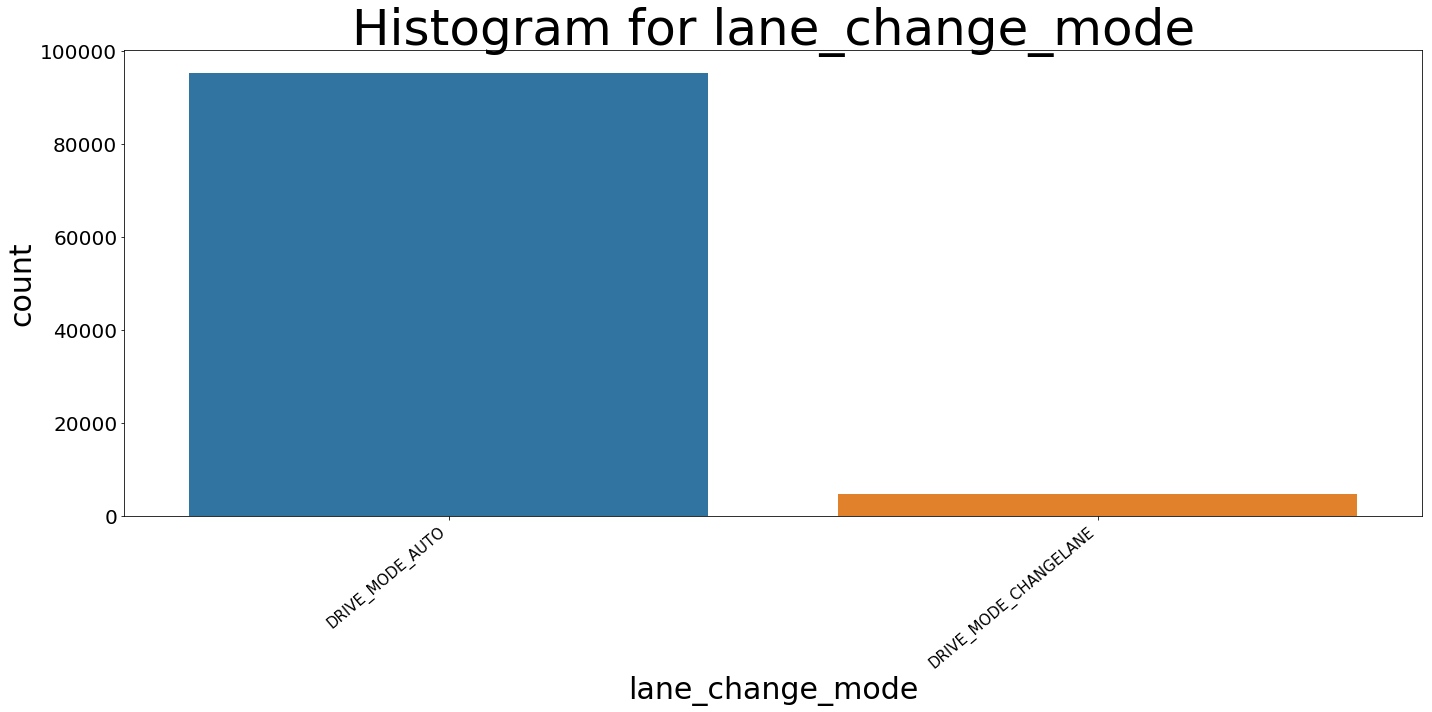

In [8]:
plot_counts_bar_chart(data['lane_change_mode'],'lane_change_mode')

# Histogram of Safe_net_Front

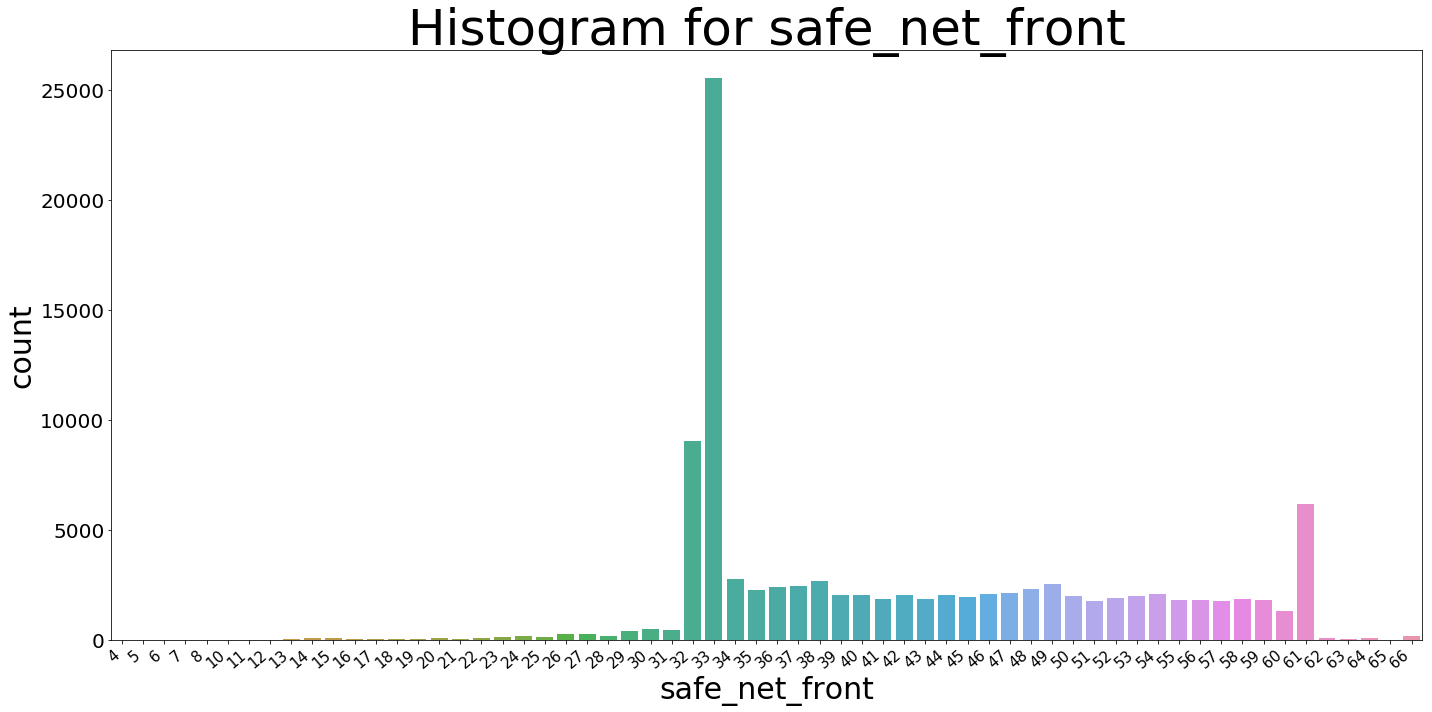

In [10]:
plot_counts_bar_chart(data['safe_net_front'],"safe_net_front")

# Histogram of Action

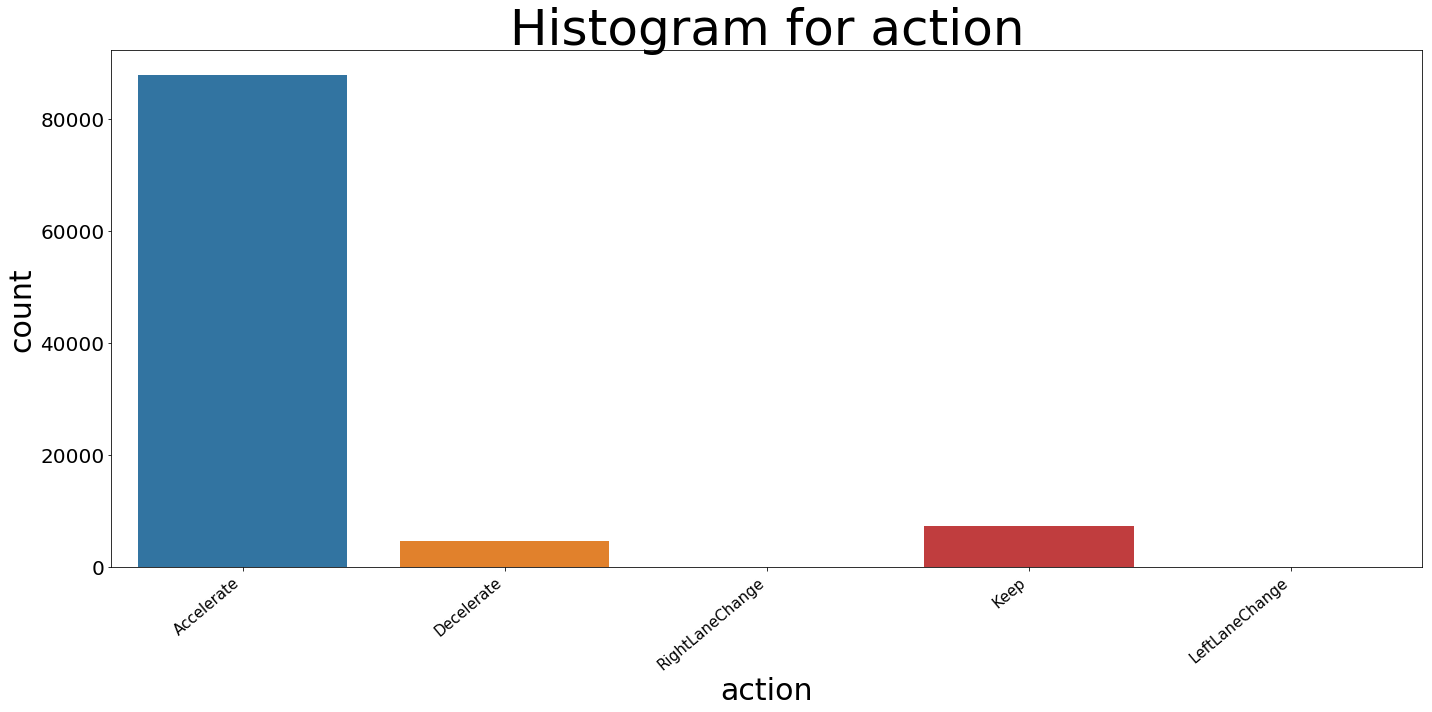

In [12]:
plot_counts_bar_chart(data['action'],"action")

# Functions for Analysis

In [32]:
def plot_histogram(data,column_name):
    plt.figure(figsize=(20,10))
    ax=sns.distplot(data,hist_kws=dict(edgecolor="k", linewidth=2))
    ax.set_title("Histogram for "+column_name,fontsize=50)    
    y=ax.get_yaxis()
    y.set_tick_params(labelsize=20)
    ax.set_xlabel(column_name,fontsize=30)
    ax.set_ylabel("frequency",fontsize=30)
    plt.tight_layout()
    plt.show()
def plot_Distribution(data,title):
    data.plot(kind='hist', bins = 10, figsize=(15,6), title=title)
    plt.title(title, fontsize='xx-large')
    plt.xlabel(title)
    plt.show()
def plot_hist(data, distLabel):
    data.value_counts().sort_index(ascending=False).plot(kind='barh', figsize=(15,6))
    plt.title(distLabel, fontsize='xx-large')
    plt.show()
def plot_speed_speed_limit(speed, speed_limit):
    plt.plot(speed)
    plt.plot(speed_limit)
    plt.show()
def plot_previous_current_action(previous_decision,action):
    plt.figure(figsize=(25, 14))
    val1,count1= np.unique(action, return_counts=True)
    val, count = np.unique(previous_decision, return_counts=True)
    val[val=='Accelerate'] = 'Accelerate1'
    val[val=='Decelerate'] = 'Decelerate1'
    val[val=='Keep'] = 'Keep1'
    val[val=='LeftLaneChange'] = 'LeftLaneChange1'
    val[val=='RightLaneChange'] = 'RightLaneChange1'
    val = val.tolist()
    count = count.tolist()
    val1= val1.tolist()
    count1= count1.tolist()
    vals = []
    counts = []
    k = 0
    while k < len(val):
        vals.append(val[k])
        try:
            vals.append(val1[k])
            counts.append(count[k])
            counts.append(count1[k])
        except:
            counts.append(count[k])
        k+=1
    plt.bar(vals ,counts ,0.5)
    plt.show()
def plot_violin_plot(data, of, wrt, andwrt, title):
    plt.figure(figsize=(25, 14))
    sns.violinplot(x=of, y=wrt, hue=andwrt, data=data)
    plt.title(title)
    plt.show()
def plot_heatmap(data):
    sns.heatmap(data.corr())
    plt.show()
def plot_displot(data):
    sns.distplot(data)
    plt.show()
def plot_kurtosis(data):
    plt.figure(figsize = (12,8))
    sns.distplot(data.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
    plt.show()
def plot_skew(data):
    plt.figure(figsize = (12,8))
    sns.distplot(data.skew(),color='r',axlabel ='Skew',norm_hist= False, kde = True,rug = False)
    plt.show()


# Histogram of Speed

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


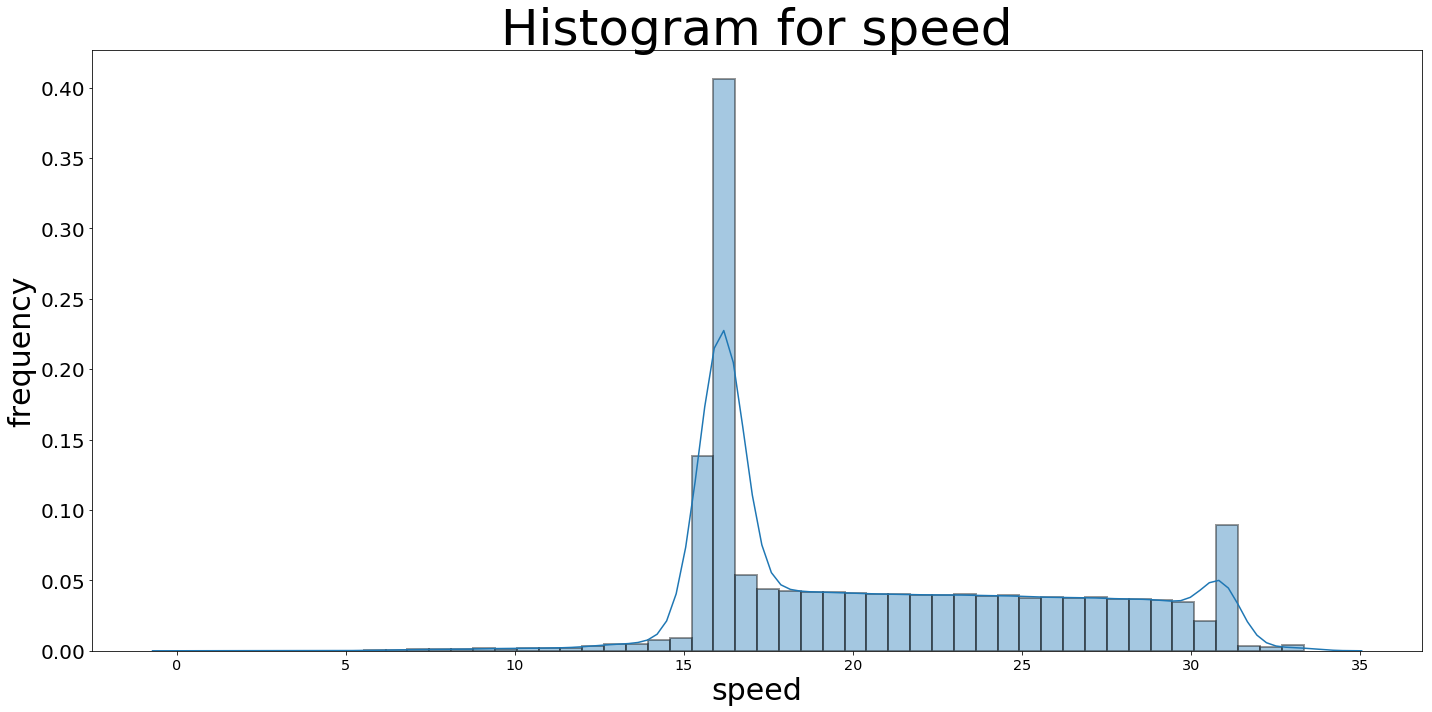

In [33]:
plot_histogram(data['speed'],'speed')

# Histogram of Acceleration

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


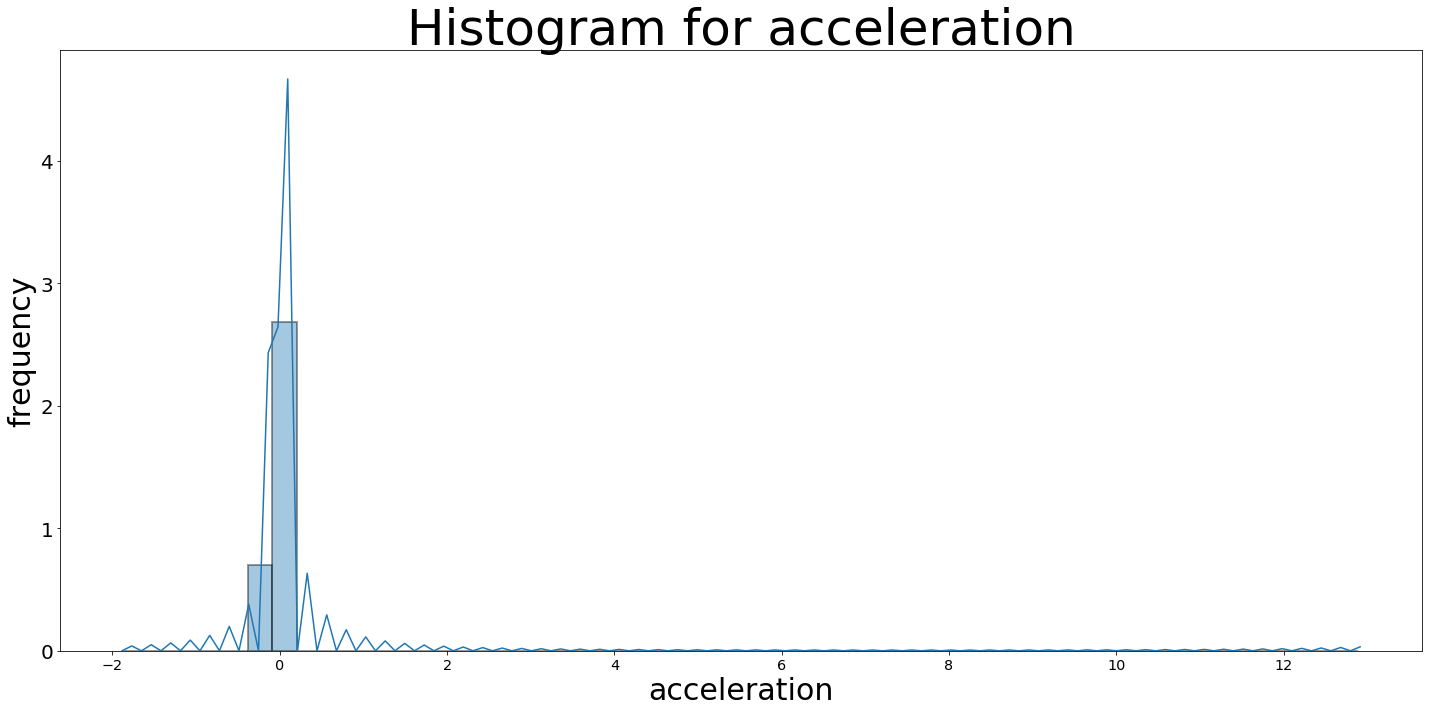

In [16]:
prev_speed=data.speed[:-1]
curr_speed=data.speed[1:]
acc=np.array(curr_speed)-np.array(prev_speed)
plot_histogram(acc,'acceleration')

# Boxplot for Speed

Text(0.5,1,'speed box plot')

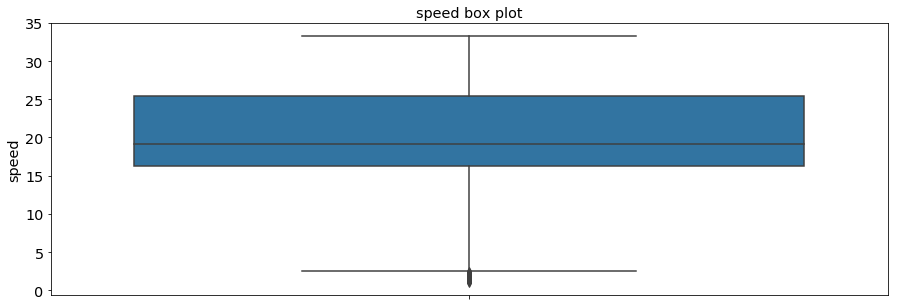

In [17]:
ax=sns.boxplot(y=data['speed'])
ax.set_title("speed box plot")

# Counts of Lane Change Mode 

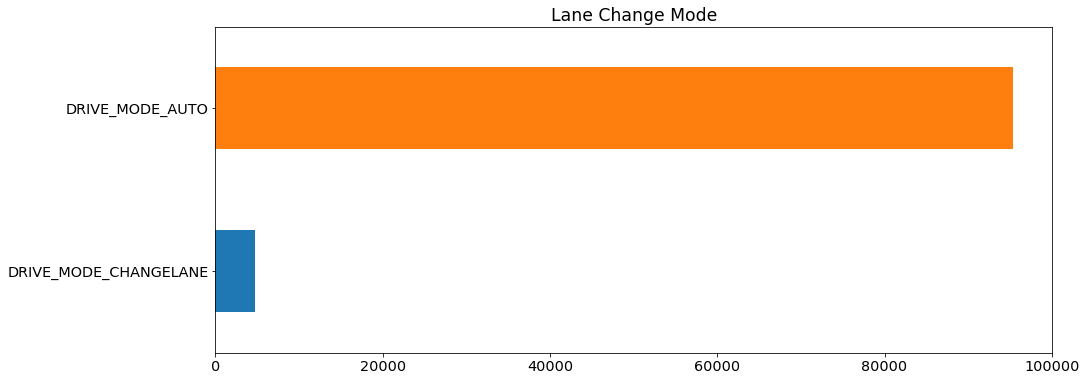

In [23]:
plot_hist(data.lane_change_mode, "Lane Change Mode")

# Speed Distribution Plot

# continuous distribution

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


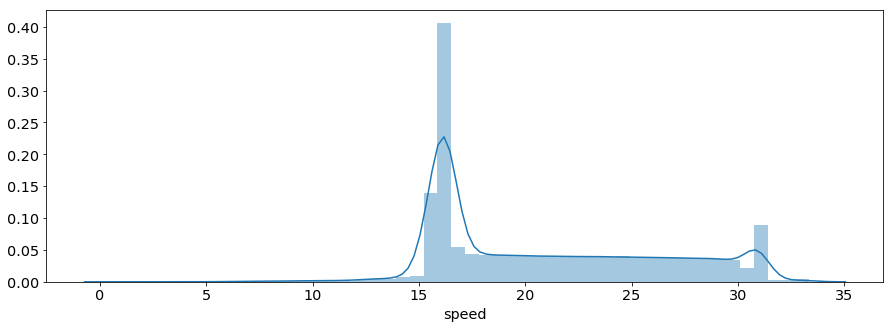

In [24]:
plot_displot(data['speed'])

# Bins Distribution

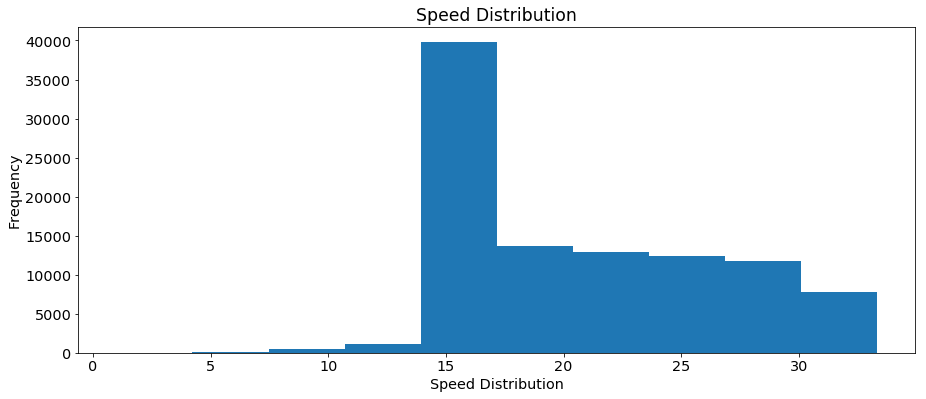

In [26]:
plot_Distribution(data.speed, "Speed Distribution")

# Safety Distance Histogram

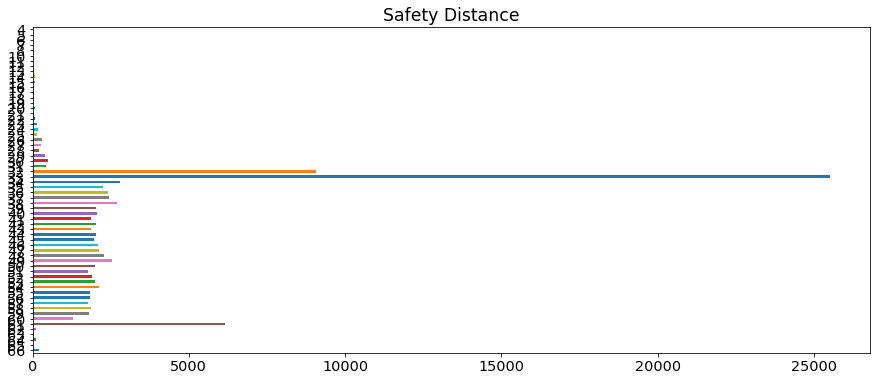

In [27]:
plot_hist(data.safe_net_front, "Safety Distance")

# Variation between Previous and Current Action

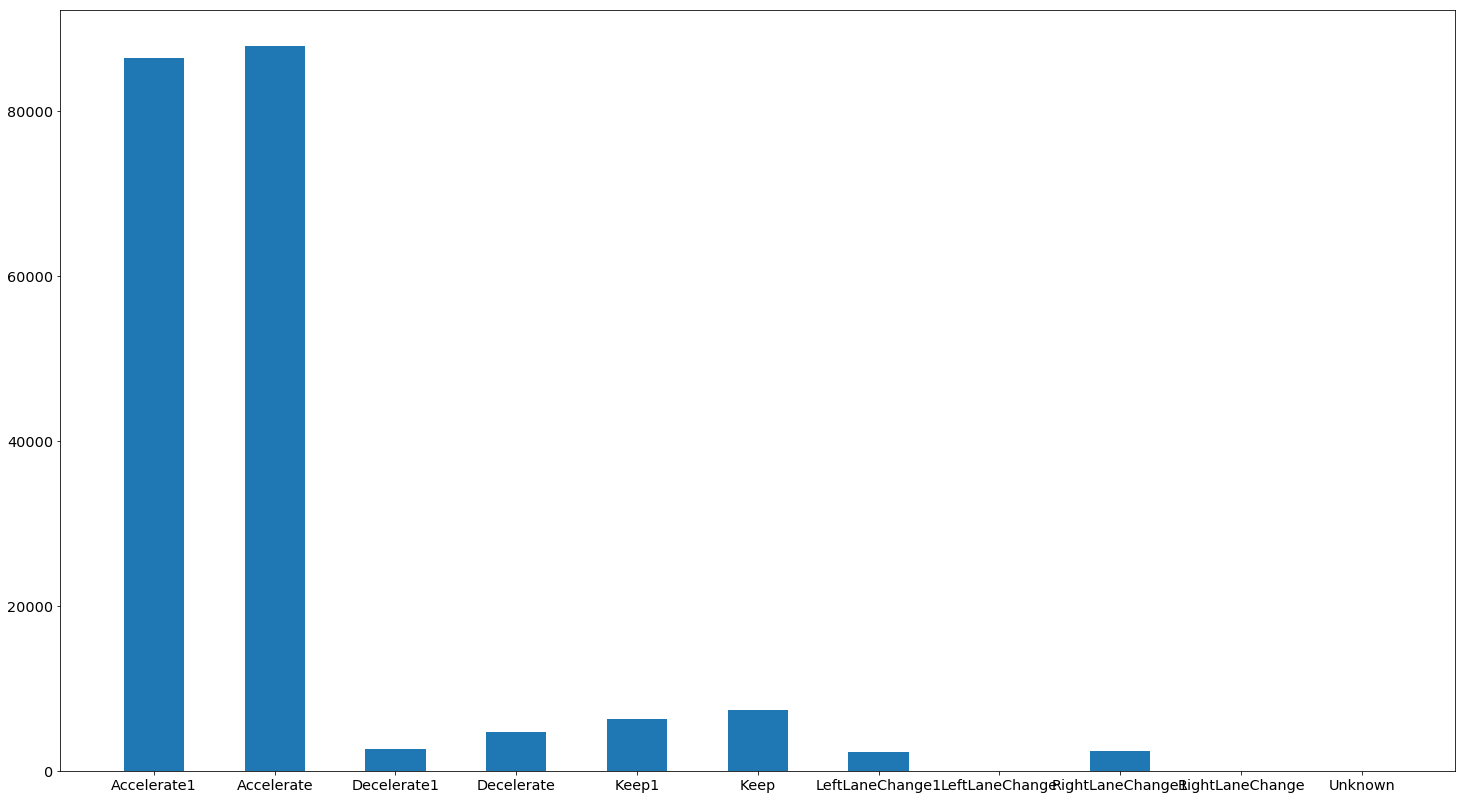

In [29]:
plot_previous_current_action(data.previous_decision, data.action)

# bivariate

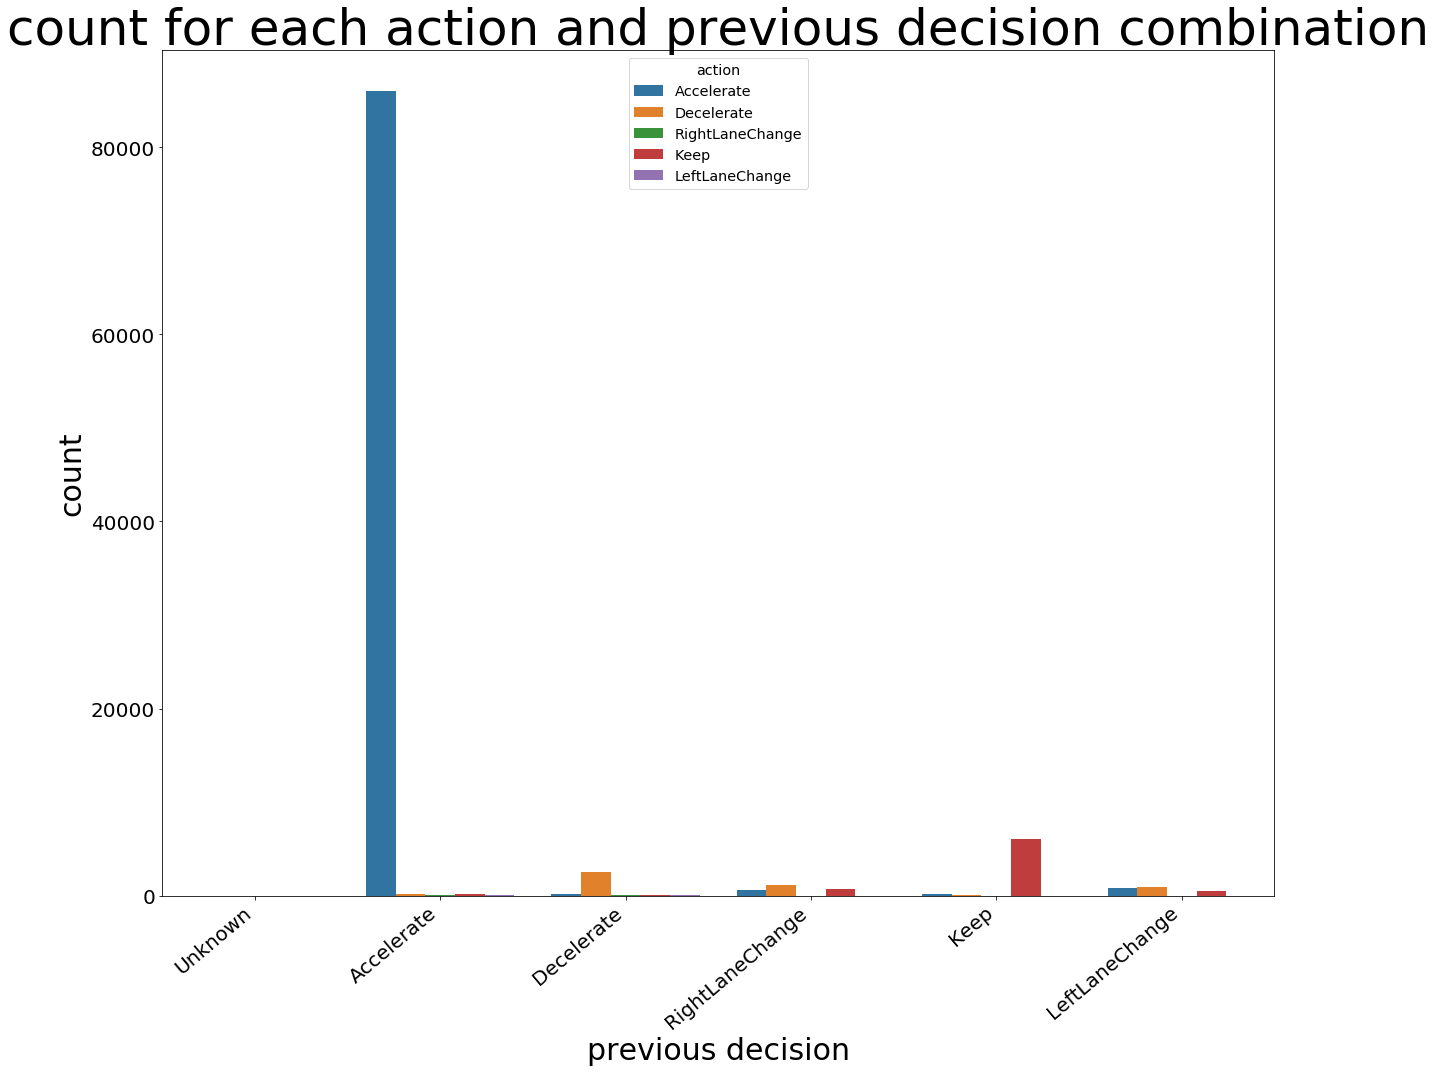

In [18]:
plt.figure(figsize=(20,15))
ax=sns.countplot(x="previous_decision",hue="action",data=data)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=20)
ax.set_title("count for each action and previous decision combination",fontsize=50)
y=ax.get_yaxis()
y.set_tick_params(labelsize=20)
ax.set_xlabel("previous decision",fontsize=30)
ax.set_ylabel("count",fontsize=30)

plt.tight_layout()
plt.show()

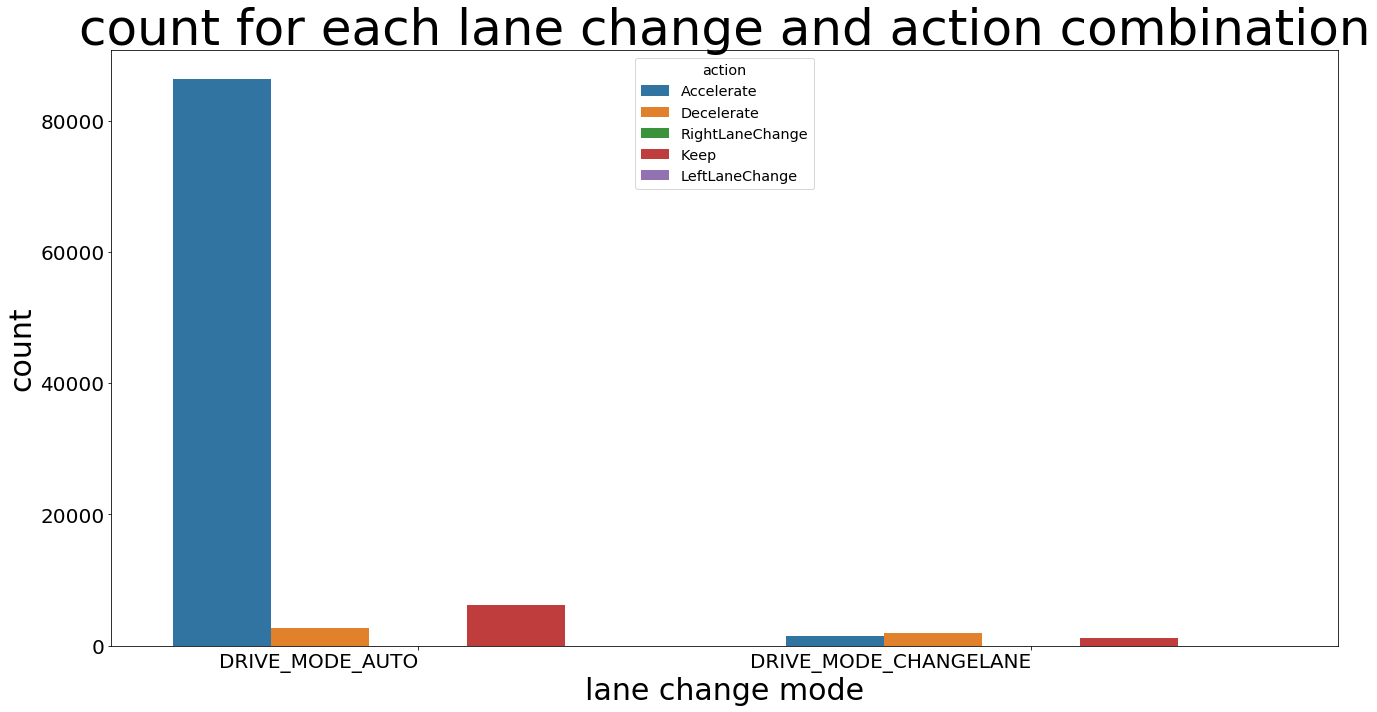

In [19]:
plt.figure(figsize=(20,10))
ax=sns.countplot(hue="action",x="lane_change_mode",data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right",fontsize=20)
ax.set_title("count for each lane change and action combination",fontsize=50)
y=ax.get_yaxis()
y.set_tick_params(labelsize=20)
ax.set_xlabel("lane change mode",fontsize=30)
ax.set_ylabel("count",fontsize=30)
plt.tight_layout()
plt.show()


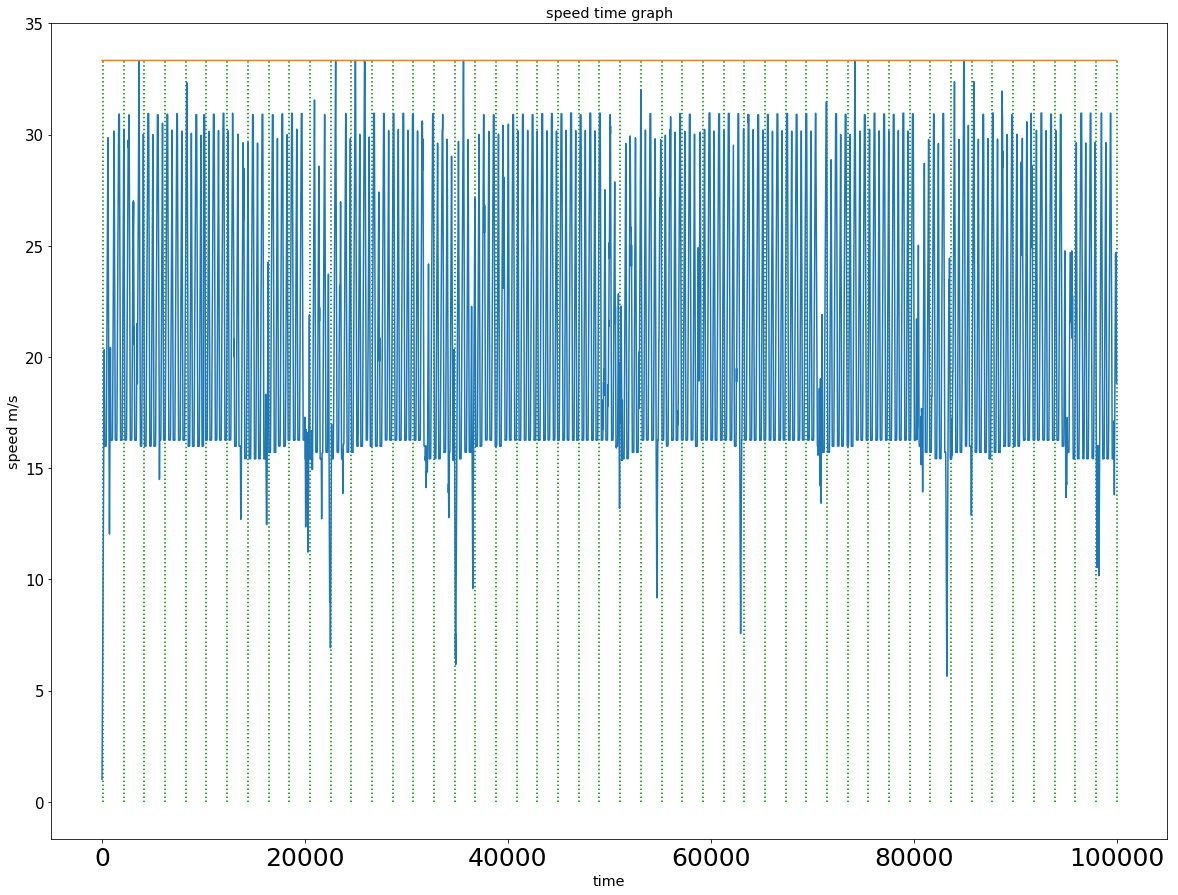

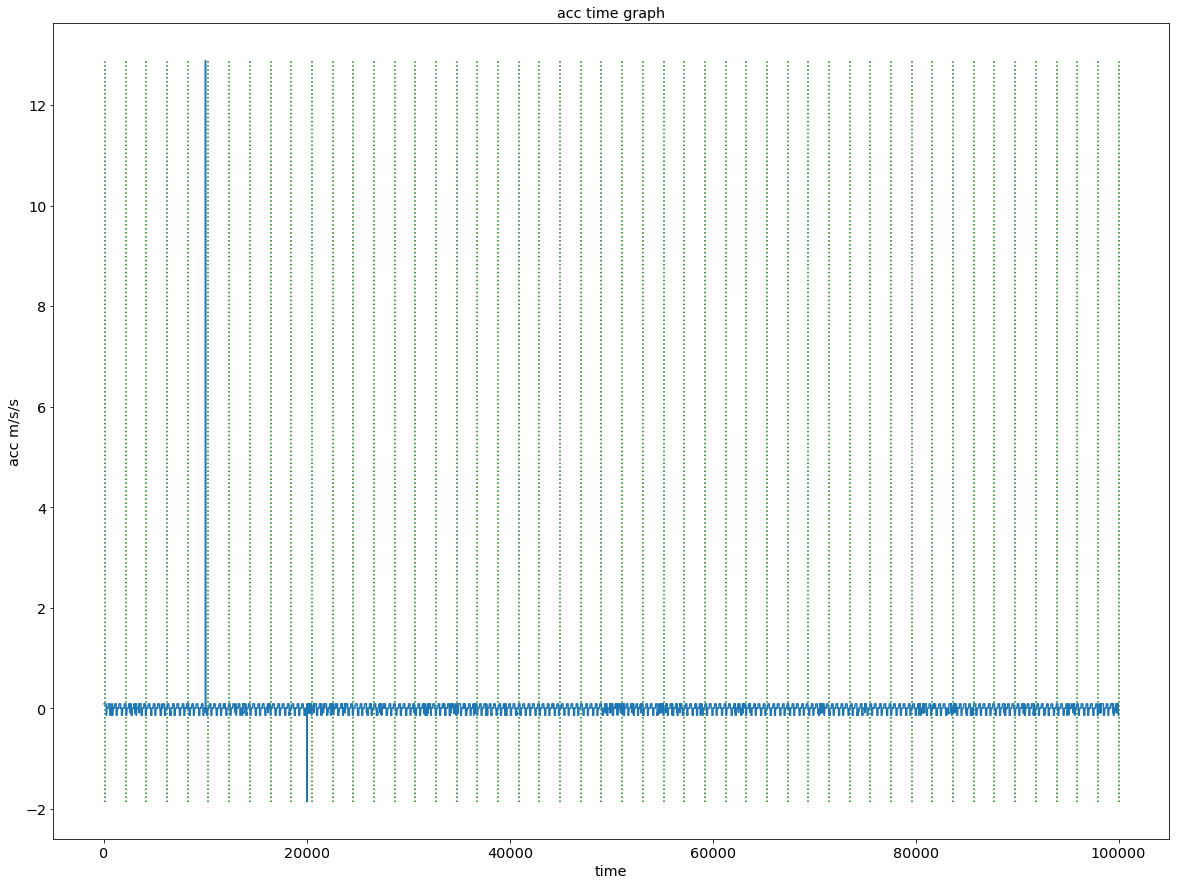

In [20]:
#plotting speed
fig,axis=plt.subplots(1,figsize=(20,15))
# fig.tight_layout()
x=axis.get_xaxis()
x.set_tick_params(labelsize=25)
y=axis.get_yaxis()
y.set_tick_params(labelsize=15)
x.set_label_text("time")
y.set_label_text("speed m/s")
axis.set(title="speed time graph")
axis.plot(data['speed'])
axis.plot(data['speed_limit'])
axis.vlines(np.linspace(len(data.speed),100),ymin=0,ymax=np.max(data.speed),color='green',linestyle="dotted")

# axis.plot(data.action)


fig,axis=plt.subplots(1,figsize=(20,15))
x=axis.get_xaxis()
y=axis.get_yaxis()
x.set_label_text("time")
y.set_label_text("acc m/s/s")
axis.set(title="acc time graph")
axis.plot(acc)
axis.vlines(np.linspace(len(acc),100),ymin=np.min(acc),ymax=np.max(acc),color='green',linestyle="dotted")



C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


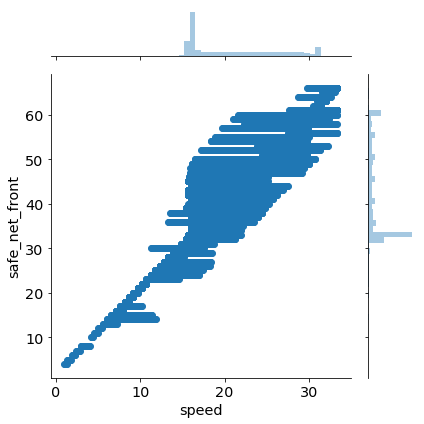

In [21]:
#speed net vs speed
ax=sns.jointplot(x="speed", y="safe_net_front", data=data)
plt.tight_layout()
plt.show()

# Correlation

# Heatmap

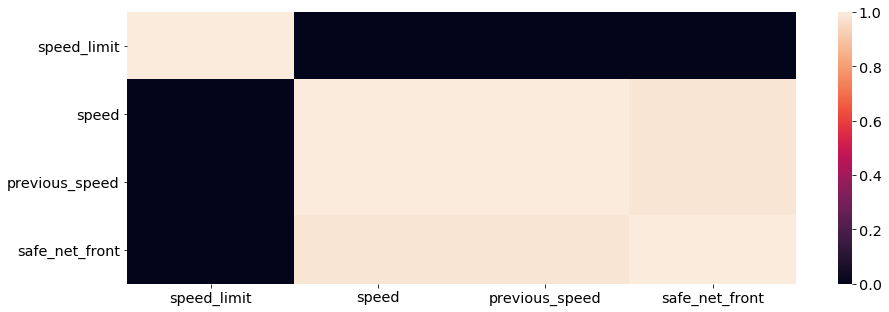

In [30]:
cols = data.columns.tolist()
cols.remove('observe_net_shape')
cols.remove('ob_net')
cols.remove('key')
cols.remove('profile')
cols.remove('id')
plot_heatmap(data[cols])